<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/0_sequential_regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential Regression Model in Neural Networks

In [12]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from keras import optimizer_v2

In [4]:
url='https://raw.githubusercontent.com/ShantanuVidwans/sequential_regression_model/master/data.csv'
df=pd.read_csv(url)
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [19]:
#change dataframe to numpy array
x=df.iloc[:,0:1].values
y=df.iloc[:,1:2].values

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15, random_state=1)
x_train.shape

(255, 1)

In [8]:
model= Sequential()
model.add(Dense(200,input_dim=1,activation='relu'))
model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dense(1,input_dim=200,activation='linear'))

In [18]:
opt=keras.optimizer_v2.adam.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer= opt, metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               400       
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,001
Trainable params: 81,001
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
training=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.15, validation_data=None, verbose=1)


Epoch 1/50
7/7 [==============================] - 1s 38ms/step - loss: 2352.6045 - mse: 2352.6045 - val_loss: 1374.7682 - val_mse: 1374.7682
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 513.7947 - mse: 513.7947 - val_loss: 17.1614 - val_mse: 17.1614
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 164.1567 - mse: 164.1567 - val_loss: 271.4440 - val_mse: 271.4440
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 68.0423 - mse: 68.0423 - val_loss: 22.4146 - val_mse: 22.4146
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 56.4117 - mse: 56.4117 - val_loss: 47.5875 - val_mse: 47.5875
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 24.1350 - mse: 24.1350 - val_loss: 21.7196 - val_mse: 21.7196
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 21.9370 - mse: 21.9370 - val_loss: 22.9139 - val_mse: 22.9139
Epoch 8/50
7/7 [==============================] - 0s 8ms/ste

In [22]:
keras.backend.clear_session()

In [24]:
pred=model.predict(x_test)
pred

array([[ 46.470367 ],
       [ 12.049167 ],
       [  3.9190516],
       [ 44.445618 ],
       [ -1.1631153],
       [ 20.148283 ],
       [ 58.618874 ],
       [ 53.55699  ],
       [  5.9734106],
       [ 54.569366 ],
       [ 76.84163  ],
       [ 60.64362  ],
       [ 47.482742 ],
       [ 69.755    ],
       [ 99.11388  ],
       [ 52.54462  ],
       [ 19.135893 ],
       [ 66.71787  ],
       [  6.98722  ],
       [ 27.23501  ],
       [ 21.160673 ],
       [ 41.408466 ],
       [ 96.07675  ],
       [ 97.08913  ],
       [ 12.049167 ],
       [ 87.97775  ],
       [ 55.581745 ],
       [ 67.730255 ],
       [ -1.1631153],
       [ 37.358902 ],
       [ 53.556995 ],
       [ 91.01487  ],
       [ 14.073946 ],
       [ 57.606495 ],
       [ 88.99012  ],
       [ 59.63125  ],
       [ 14.073946 ],
       [ 49.507492 ],
       [ 68.74262  ],
       [ 96.07675  ],
       [101.138626 ],
       [ 14.073946 ],
       [ 73.8045   ],
       [ 36.346516 ],
       [ 46.470367 ]], dtype=flo

In [26]:
pred.shape

(45, 1)

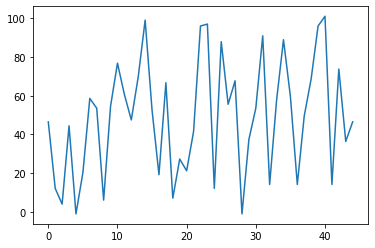

In [25]:
import matplotlib.pyplot as plt
plt.plot(pred)